**Question 1:** What is Simple Linear Regression?

- Simple Linear Regression is a supervised learning algorithm that models the relationship between two variables —

one independent variable (X)

one dependent variable (Y)

It tries to find a straight-line (linear) relationship between them.

🔹 Equation:

The equation of the regression line is:

𝑌=
𝑏0
+
𝑏1𝑋

where:

Y → Dependent variable (what we want to predict)

X → Independent variable (input or predictor)

𝑏0 → Intercept (the value of Y when X = 0)

b1 -> slope (how much Y changes when X increases by 1 unit)

---


**Question2:** What are the key assumptions of Simple Linear Regression?
- Simple Linear Regression relies on a few important assumptions to ensure that its predictions and statistical conclusions are valid.

**1.Linearity:** X and Y have a straight-line relationship.

**2.Independence:**
Errors (residuals) are independent of each other.

**3.Homoscedasticity:**
Errors have constant variance (equal spread).

**4.Normality:**
Errors are normally distributed.

**5.No Multicollinearity:**
Only one X variable here, so this is automatically true.

| Assumption           | Meaning                                | Problem if Violated              |
| -------------------- | -------------------------------------- | -------------------------------- |
| Linearity            | Relationship between X and Y is linear | Model fits poorly                |
| Independence         | Errors are independent                 | Leads to autocorrelation         |
| Homoscedasticity     | Constant variance of errors            | Biased estimates                 |
| Normality            | Errors follow normal distribution      | Invalid hypothesis tests         |
| No Multicollinearity | X’s not correlated                     | (Applies to multiple regression) |


---

**Question3:** What is heteroscedasticity, and why is it important to address in regression models?

 - It means the variance of errors (residuals) is not constant across all levels of the independent variable.
In simple words — the spread of errors increases or decreases as X changes.

**Why it’s important:**

 - It violates regression assumptions (homoscedasticity).

 - It makes the model’s estimates less reliable.

 - Standard errors, t-tests, and confidence intervals can become incorrect — leading to wrong conclusions.

 Example:
If prediction errors for small X values are small but very large for big X values — that’s heteroscedasticity.

---


**Question4:** What is Multiple Linear Regression?

  - It is a supervised learning algorithm that shows the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).

Equation:

𝑌=
𝑏0
+
𝑏
1
𝑋
1
+
𝑏
2
𝑋
2
+
𝑏
3
𝑋
3
+
.
.
.
+
𝑏
𝑛
𝑋
𝑛

where:

Y = dependent variable

𝑋
1
,
𝑋
2 = independent variables

𝑏0
= intercept

𝑏
1
,
𝑏
2= slopes (effect of each X on Y)

Example:

Predicting house price (Y) using size, number of rooms, and location (X₁, X₂, X₃).

---

**Question5:**  What is polynomial regression, and how does it differ from linear regression?

 -  Polynomial Regression:

It is a type of linear regression where the relationship between X and Y is curved (non-linear).
It uses powers of X (like X², X³, etc.) to model the curve.

Equation:
𝑌
=
𝑏
0
+
𝑏
1
𝑋
+
𝑏
2
𝑋
2
+
𝑏
3
𝑋
3
+
.
.
.
+
𝑏
𝑛
𝑋
𝑛


**Difference from Linear Regression:**

| Feature       | Linear Regression   | Polynomial Regression             |
| ------------- | ------------------- | --------------------------------- |
| Relationship  | Straight line       | Curved line                       |
| Equation form | ( Y = b_0 + b_1X )  | ( Y = b_0 + b_1X + b_2X^2 + ... ) |
| Use           | When data is linear | When data shows a curve or bend   |


---

**Question6:** Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004


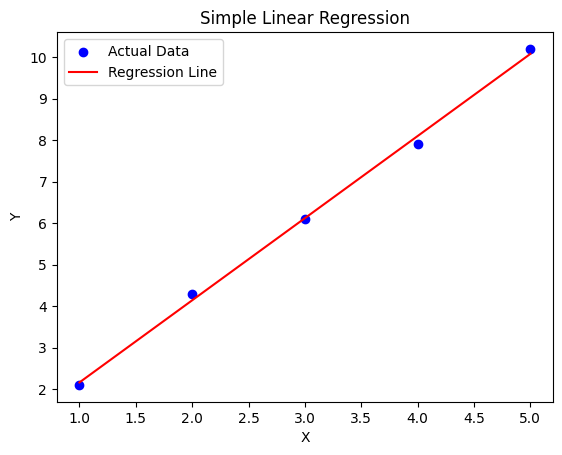

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Print slope and intercept
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')       # actual data points
plt.plot(X, Y_pred, color='red', label='Regression Line')  # regression line
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


**Question7:** Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

# Independent and dependent variables
X = data[['Area', 'Rooms']]
Y = data['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Print coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept (b0): 103157.89473684214
Coefficients (b1, b2): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


**Question8:** Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.


Intercept (b0): 0.06000000000000938
Coefficients (b1, b2): [0.   1.94 0.2 ]


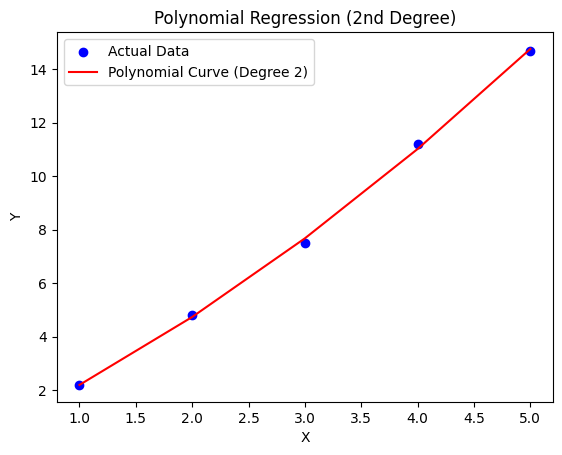

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict Y values
Y_pred = model.predict(X_poly)

# Print model coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

# Plot data points and the polynomial curve
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Curve (Degree 2)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (2nd Degree)")
plt.legend()
plt.show()


**Question9:** Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals

Residuals: [-3.   5.5 -1.  -2.5  1. ]


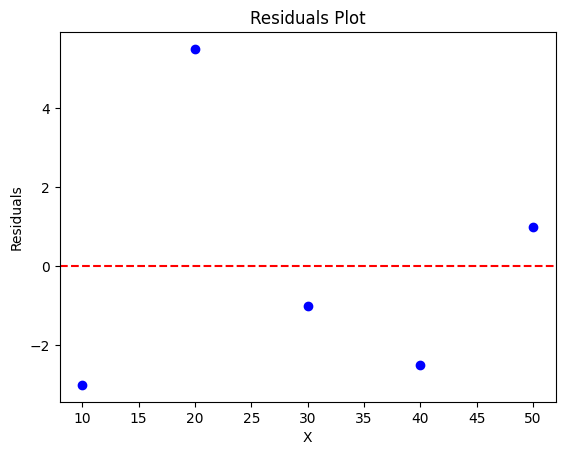

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals (errors)
residuals = Y - Y_pred

# Print residuals
print("Residuals:", residuals)

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


**Question10:**Imagine you are a data scientist working for a real estate company.You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression model.Explain the steps you would take to address these issues and ensure a robust model.

  -  **Problem 1: Heteroscedasticity**

Heteroscedasticity occurs when the variance of residuals is not constant. This can make predictions and statistical tests unreliable.

Steps to handle it:

**1.Transform the dependent variable (Price)**

Apply log, square root, or Box-Cox transformations to stabilize variance.

Example: Y_log = np.log(Price)

**Weighted Regression**

Give less weight to data points with larger variance.

**Use Robust Regression Models**

Algorithms like RANSAC, HuberRegressor, or Quantile Regression are less sensitive to heteroscedasticity.

**Check residual plots again**

Ensure residuals are now more evenly spread.

**Problem 2: Multicollinearity**

Multicollinearity occurs when independent variables are highly correlated, making it hard to interpret coefficients.

Steps to handle it:

**Check VIF (Variance Inflation Factor)**

Remove variables with VIF > 5–10.

**Drop or combine correlated features**

For example, combine Area and Rooms into a single metric like Price per room.

**Use dimensionality reduction**

Principal Component Analysis (PCA) transforms correlated features into uncorrelated components.

**Use regularized regression**

Ridge or Lasso Regression penalizes large coefficients, reducing multicollinearity effects.

# Additional Steps for a Robust Model

**Feature scaling:** Standardize features if using regularized models.

**Cross-validation:** Use K-Fold CV to ensure model generalizes well.

**Model selection:** Compare linear, polynomial, and tree-based models (like Random Forest) which handle non-linear relationships.

**Residual diagnostics:** Always check residuals plots after adjustments